<a href="https://colab.research.google.com/github/Abhishek416/SLE_CAPSTONE/blob/main/Guide_rev_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt # to draw graphs
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import ConfusionMatrixDisplay # creates and draws a confusion matrix
import pandas as pd
import numpy as np
from collections import Counter
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import plotly.express as px



> external resources articles

> https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4301850/





In [73]:
df=pd.read_csv('/content/stage1_data.csv')

In [74]:
df

,Age,Age of SLE debut,Age at diagnosis,Disease duration,Height,Weight,BMI,PRE (in the debut of SLE),CYC (total dose in grams),SLEDAI-2K,...,ANF (currently),Anti-dsDNA (in debut),Anti-dsDNA (currently),IFN-α,IL-18,IL-6,CCI,CiRS (general),CIRS (severity index),Class
0,46,9,32,14,152.0,62.0,26.8,15,12.0,0,...,320,48.5,4.2,3.16,618.540,0.40,2,7,1.75,1
1,51,12,28,23,162.0,78.0,29.7,30,100.0,6,...,1280,8.2,60.0,5.02,467.830,3.70,3,6,1.50,1
2,40,7,20,20,158.0,80.0,32.0,60,26.0,10,...,320,150.7,130.0,4.44,114.250,1.40,4,7,1.17,1
3,36,15,16,20,159.0,58.0,22.9,20,0.0,2,...,640,67.0,0.0,3.19,433.300,0.30,1,3,3.00,0
4,38,17,20,18,165.0,77.0,28.3,120,24.0,6,...,320,232.0,200.0,2.78,393.836,7.82,1,8,1.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,41,39,40,1,180.0,73.0,22.5,15,0.0,7,...,640,21.0,70.0,2.82,333.000,1.54,2,3,3.00,1
116,49,20,47,2,172.0,62.0,20.9,15,0.0,4,...,160,12.0,189.0,1.16,296.034,1.47,2,7,2.33,1
117,38,29,34,4,172.0,148.0,50.0,50,1.0,2,...,0,32.0,12.0,0.58,99.182,1.05,1,4,2.00,1
118,35,34,34,1,164.0,65.0,24.1,60,0.0,12,...,160,305.0,17.7,1.16,987.533,0.77,1,4,2.00,1


In [75]:
df.columns

Index(['Age', 'Age of SLE debut', 'Age at diagnosis', 'Disease duration',
       'Height', 'Weight', 'BMI', 'PRE (in the debut of SLE)',
       'CYC (total dose in grams)', 'SLEDAI-2K', 'SDI',
       'Number of exacerbations of SLE', 'SF-36 (mental)', 'SF-36  (physical)',
       'LupusQol', 'Hb (in debut)', 'Hb (currently)', 'Er (in debut)',
       'Er  (currently)', 'Leu  (in debut)', 'Leu (currently)',
       'Tr (in debut)', 'Tr (currently)', 'ESR (in debut)', 'ESR (currently)',
       'Complement c3 (g/l)', 'Complement C4 (g/l)', 'ANF (in debut)',
       'ANF (currently)', 'Anti-dsDNA (in debut)', 'Anti-dsDNA (currently)',
       'IFN-α', 'IL-18', 'IL-6', 'CCI', 'CiRS (general)',
       'CIRS (severity index)', 'Class'],
      dtype='object')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             120 non-null    int64  
 1   Age of SLE debut                120 non-null    int64  
 2   Age at diagnosis                120 non-null    int64  
 3   Disease duration                120 non-null    int64  
 4   Height                          120 non-null    float64
 5   Weight                          120 non-null    float64
 6   BMI                             120 non-null    float64
 7   PRE (in the debut of SLE)       120 non-null    int64  
 8   CYC (total dose in grams)       120 non-null    float64
 9   SLEDAI-2K                       120 non-null    int64  
 10  SDI                             120 non-null    int64  
 11  Number of exacerbations of SLE  120 non-null    int64  
 12  SF-36 (mental)                  120 

In [77]:
null_values_data = df.isnull().sum()
print(null_values_data)

Age                               0
Age of SLE debut                  0
Age at diagnosis                  0
Disease duration                  0
Height                            0
Weight                            0
BMI                               0
PRE (in the debut of SLE)         0
CYC (total dose in grams)         0
SLEDAI-2K                         0
SDI                               0
Number of exacerbations of SLE    0
SF-36 (mental)                    0
SF-36  (physical)                 0
LupusQol                          0
Hb (in debut)                     0
Hb (currently)                    0
Er (in debut)                     0
Er  (currently)                   0
Leu  (in debut)                   0
Leu (currently)                   0
Tr (in debut)                     0
Tr (currently)                    0
ESR (in debut)                    0
ESR (currently)                   0
Complement c3 (g/l)               0
Complement C4 (g/l)               0
ANF (in debut)              

In [78]:
fig=px.scatter_3d(df,x=df['Height'],y=df['Weight'],z=df['Age'],color=df['Class'].astype('str'))
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
fig.show()

In [79]:
df.head()

,Age,Age of SLE debut,Age at diagnosis,Disease duration,Height,Weight,BMI,PRE (in the debut of SLE),CYC (total dose in grams),SLEDAI-2K,...,ANF (currently),Anti-dsDNA (in debut),Anti-dsDNA (currently),IFN-α,IL-18,IL-6,CCI,CiRS (general),CIRS (severity index),Class
0,46,9,32,14,152.0,62.0,26.8,15,12.0,0,...,320,48.5,4.2,3.16,618.540,0.40,2,7,1.75,1
1,51,12,28,23,162.0,78.0,29.7,30,100.0,6,...,1280,8.2,60.0,5.02,467.830,3.70,3,6,1.50,1
2,40,7,20,20,158.0,80.0,32.0,60,26.0,10,...,320,150.7,130.0,4.44,114.250,1.40,4,7,1.17,1
3,36,15,16,20,159.0,58.0,22.9,20,0.0,2,...,640,67.0,0.0,3.19,433.300,0.30,1,3,3.00,0
4,38,17,20,18,165.0,77.0,28.3,120,24.0,6,...,320,232.0,200.0,2.78,393.836,7.82,1,8,1.60,1


In [80]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [81]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
column_names = X.columns
X_std_df = pd.DataFrame(X_std, columns=column_names)
X_std_df.to_csv('standard.csv',index=False)

In [82]:
fig=px.scatter_3d(X_std_df,x=X_std_df['Height'],y=X_std_df['Weight'],z=X_std_df['Age'],color=df['Class'].astype('str'))
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
fig.show()

In [84]:
pca = PCA(n_components=20)
pca.fit(X_std)

PCA(n_components=20)

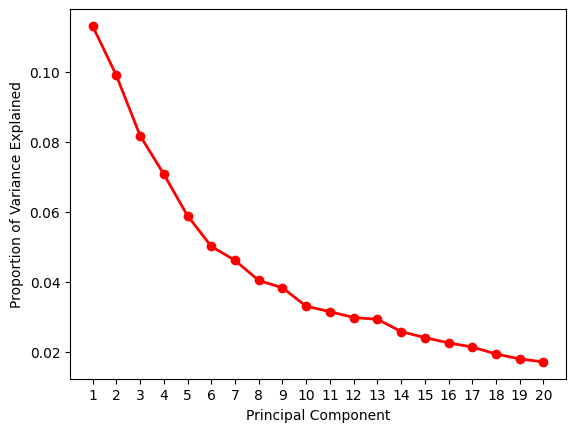

[[ 3.03888978e-01  2.67349899e-01  3.42142420e-01 -9.32942352e-02
   7.84500127e-02  2.74731824e-01  2.82089380e-01 -1.15731917e-01
   8.43505414e-03 -1.44218607e-01  1.47047881e-02 -1.57199764e-01
  -9.97290636e-02 -1.28934492e-01 -1.05120996e-01  2.57251675e-01
   2.70906671e-01  1.00145207e-01  2.42680934e-01  2.51921975e-02
   5.19680146e-02 -2.90553334e-02 -1.23549999e-02 -1.39110059e-01
  -1.44380560e-01  2.36166243e-01  1.65970714e-01 -1.13019575e-01
  -1.51789077e-01 -1.16667213e-01 -1.47152325e-01  8.87177500e-02
  -1.13500816e-01  3.44761967e-02  1.29598564e-01  7.77448745e-02
  -1.37421446e-02]
 [ 1.11758475e-01 -7.76502678e-02 -1.16448573e-01  3.22355279e-01
  -5.13557331e-02  1.73681389e-01  2.12977917e-01  2.99896100e-01
   1.90594076e-01  1.21524207e-01  3.71421978e-01  3.27181220e-01
   5.69474961e-02 -1.50087294e-01 -1.19516844e-01  5.22283601e-03
  -3.30657840e-02 -5.52329181e-02  5.79037147e-03  2.33184494e-01
   1.92889491e-01  1.01203541e-01  1.19791150e-01  3.4130

In [85]:
plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(np.arange(1, pca.n_components_ + 1))
plt.show()
print(pca.components_)

In [86]:
pca = PCA(n_components=11)
pca.fit(X_std)

PCA(n_components=11)

In [87]:
feature_loadings = pca.components_
selected_feature_indices = np.abs(feature_loadings).argmax(axis=1)
pca_selected = [i for i in selected_feature_indices]

In [89]:
print("Selected Features:")
l=[]
for i in pca_selected:
  l.append(df.columns[i])
print(l)

Selected Features:
['Age at diagnosis', 'SDI', 'ESR (currently)', 'SLEDAI-2K', 'Tr (in debut)', 'Leu  (in debut)', 'ANF (in debut)', 'Leu (currently)', 'IFN-α', 'CIRS (severity index)', 'Tr (in debut)']


In [90]:
from sklearn import model_selection

c1=['Age at diagnosis', 'SDI', 'ESR (currently)', 'SLEDAI-2K', 'Tr (in debut)', 'Leu  (in debut)', 'ANF (in debut)', 'Leu (currently)', 'IFN-α', 'CIRS (severity index)', 'Tr (in debut)'] #PCA
X_pca = np.array(X_std_df[c1])
y = np.array(df['Class'])
t_train,t_test,T_train,T_test=model_selection.train_test_split(X_pca,y,test_size=0.3,random_state=42)

Epoch 1/10
3/3 [==============================] - 4s 661ms/step - loss: 1.3653 - accuracy: 0.3333 - val_loss: 1.2358 - val_accuracy: 0.3611
Epoch 2/10
3/3 [==============================] - 0s 125ms/step - loss: 1.3115 - accuracy: 0.4524 - val_loss: 1.2003 - val_accuracy: 0.3889
Epoch 3/10
3/3 [==============================] - 0s 139ms/step - loss: 1.1843 - accuracy: 0.4524 - val_loss: 1.1669 - val_accuracy: 0.4167
Epoch 4/10
3/3 [==============================] - 0s 177ms/step - loss: 1.2768 - accuracy: 0.4524 - val_loss: 1.1357 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 0s 170ms/step - loss: 1.2348 - accuracy: 0.5119 - val_loss: 1.1028 - val_accuracy: 0.5278
Epoch 6/10
3/3 [==============================] - 0s 88ms/step - loss: 1.2445 - accuracy: 0.4286 - val_loss: 1.0746 - val_accuracy: 0.6111
Epoch 7/10
3/3 [==============================] - 0s 111ms/step - loss: 1.1049 - accuracy: 0.4881 - val_loss: 1.0509 - val_accuracy: 0.6944
Epoch 8/10
3/3 [=====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



2/2 [==============================] - 0s 12ms/step - loss: 0.9911 - accuracy: 0.7778
Test accuracy: 0.7777777910232544


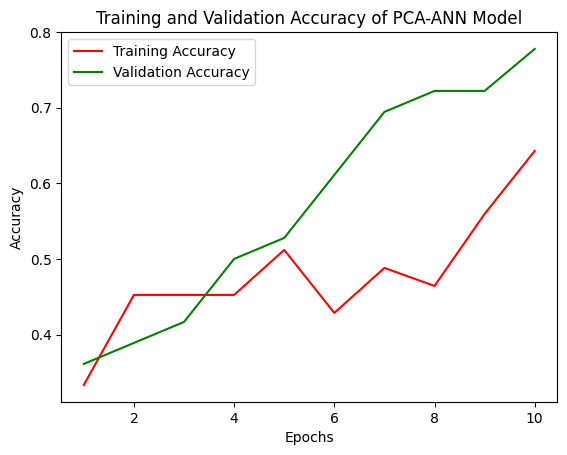

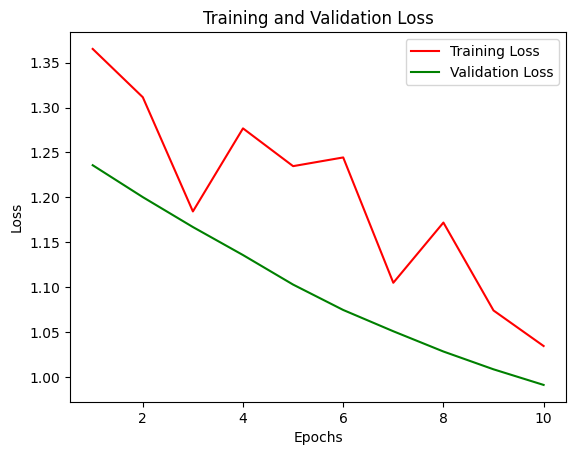

In [91]:
from keras.models import Sequential, load_model
from keras.utils import plot_model

from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def create_binary_model():
    model = Sequential()
    model.add(Dense(32, input_dim=11, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.4))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
    return model

pca_model = create_binary_model()
plot_model(pca_model, to_file='model_architecture.png', show_shapes=True)


# add early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = pca_model.fit(t_train, T_train, epochs=10, batch_size=32, validation_data=(t_test, T_test), callbacks=[early_stopping])
pca_model.save("Trained_model.h5")
# evaluate the model on the test set
loss, accuracy = pca_model.evaluate(t_test, T_test)
print("Test accuracy:", accuracy)

# Retrieve accuracy and loss values from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.plot(range(1, len(accuracy) + 1), accuracy, 'r', label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of PCA-ANN Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the accuracy plot
plt.show()

# Plot loss
plt.plot(range(1, len(loss) + 1), loss, 'r', label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the loss plot
plt.show()
